In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:

csv_file = "newborn_health_monitoring_with_risk.csv"
df = pd.read_csv(csv_file)

In [3]:
df.head()

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-13,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-14,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baby_id                      3000 non-null   object 
 1   name                         3000 non-null   object 
 2   gender                       3000 non-null   object 
 3   gestational_age_weeks        3000 non-null   float64
 4   birth_weight_kg              3000 non-null   float64
 5   birth_length_cm              3000 non-null   float64
 6   birth_head_circumference_cm  3000 non-null   float64
 7   date                         3000 non-null   object 
 8   age_days                     3000 non-null   int64  
 9   weight_kg                    3000 non-null   float64
 10  length_cm                    3000 non-null   float64
 11  head_circumference_cm        3000 non-null   float64
 12  temperature_c                3000 non-null   float64
 13  heart_rate_bpm    

In [5]:
#fill na in apgar_score by the same value for the same baby
df['apgar_score'] = df.groupby('baby_id')['apgar_score'].transform(
    lambda g: g.ffill().bfill()
)

In [6]:
df.head(10)

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,7.0,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,7.0,No,No,Healthy
3,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-13,4,3.48,...,97,Mixed,11,8,4,8.1,7.0,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-14,5,3.50,...,96,Breastfeeding,11,7,1,11.6,7.0,No,Yes,At Risk
5,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-15,6,3.46,...,97,Mixed,10,6,0,10.1,7.0,No,Yes,At Risk
6,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-16,7,3.53,...,98,Formula,11,8,1,4.0,7.0,No,No,Healthy
7,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-17,8,3.57,...,98,Formula,7,7,2,2.1,7.0,No,Yes,Healthy
8,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-18,9,3.51,...,97,Mixed,7,4,2,3.8,7.0,No,Yes,Healthy
9,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-19,10,3.69,...,96,Mixed,7,8,2,2.7,7.0,No,No,Healthy


In [7]:
df.isnull().sum()

baby_id                        0
name                           0
gender                         0
gestational_age_weeks          0
birth_weight_kg                0
birth_length_cm                0
birth_head_circumference_cm    0
date                           0
age_days                       0
weight_kg                      0
length_cm                      0
head_circumference_cm          0
temperature_c                  0
heart_rate_bpm                 0
respiratory_rate_bpm           0
oxygen_saturation              0
feeding_type                   0
feeding_frequency_per_day      0
urine_output_count             0
stool_count                    0
jaundice_level_mg_dl           0
apgar_score                    0
immunizations_done             0
reflexes_normal                0
risk_level                     0
dtype: int64

In [8]:
df.drop('baby_id', axis=1, inplace = True)
df.drop('name', axis=1, inplace = True)
df.drop('date', axis=1, inplace = True)


In [9]:
#classify data into text data asobj_df
obj_df = [var for var in df.columns if df[var].dtype == 'O' and var != 'risk_level']

In [10]:
print(df.columns)

Index(['gender', 'gestational_age_weeks', 'birth_weight_kg', 'birth_length_cm',
       'birth_head_circumference_cm', 'age_days', 'weight_kg', 'length_cm',
       'head_circumference_cm', 'temperature_c', 'heart_rate_bpm',
       'respiratory_rate_bpm', 'oxygen_saturation', 'feeding_type',
       'feeding_frequency_per_day', 'urine_output_count', 'stool_count',
       'jaundice_level_mg_dl', 'apgar_score', 'immunizations_done',
       'reflexes_normal', 'risk_level'],
      dtype='object')


In [11]:
round(df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
gestational_age_weeks,3000.0,38.878,1.570,35.40,37.800,38.800,40.100,43.00
birth_weight_kg,3000.0,3.205,0.562,1.86,2.870,3.165,3.625,4.47
birth_length_cm,3000.0,49.727,2.145,45.10,48.475,49.550,51.025,55.80
birth_head_circumference_cm,3000.0,34.128,1.486,31.20,32.975,34.100,34.800,38.10
age_days,3000.0,15.500,8.657,1.00,8.000,15.500,23.000,30.00
weight_kg,3000.0,3.670,0.621,1.79,3.220,3.660,4.100,5.41
length_cm,3000.0,50.508,2.197,45.00,49.100,50.400,51.800,57.40
head_circumference_cm,3000.0,34.439,1.501,31.10,33.300,34.400,35.300,38.70
temperature_c,3000.0,37.003,0.311,35.80,36.800,37.000,37.200,38.10
heart_rate_bpm,3000.0,139.682,10.139,100.00,133.000,140.000,146.000,173.00


In [12]:
len(df.columns)

22

In [13]:
x = df.drop('risk_level',axis=1)
y = df['risk_level']

In [14]:
x= pd.get_dummies(x,drop_first=True)
y= pd.get_dummies(y,drop_first=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, stratify=y, random_state=5)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score

# بناء الـ pipeline (الأفضل وضع SMOTENN قبل الـ Scaler)
pipeline = Pipeline([
    ('smotenn', SMOTEENN(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))  # زيادة max_iter لتفادي التحذيرات
])

# تحديد الـ hyperparameters
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

y_pred = grid.predict(X_test)
print("Test F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Params: {'model__C': 0.01, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best CV F1: 0.9376240852606296
Test F1: 0.9396636993076162
              precision    recall  f1-score   support

       False       0.59      0.80      0.68        80
        True       0.97      0.91      0.94       520

    accuracy                           0.90       600
   macro avg       0.78      0.86      0.81       600
weighted avg       0.92      0.90      0.90       600



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score

# بناء الـ pipeline (SMOTEENN → Scaler → SVC)
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', SVC())   # SVM
])

# تحديد الـ hyperparameters المناسبة لـ SVC
param_grid = {
    'model__C':[0.1, 1, 10, 100],               # قوة الضبط (regularization)
    'model__kernel':  ['linear', 'rbf', 'poly', 'sigmoid'],     # نوع kernel
    'model__gamma': ['scale', 'auto']       # مهم مع rbf
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',       # أو 'f1_macro' لو عندك بيانات غير متوازنة
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

y_pred = grid.predict(X_test)
print("Test F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Params: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best CV F1: 0.9597531995409867
Test F1: 0.9650485436893204
              precision    recall  f1-score   support

       False       0.74      0.84      0.79        80
        True       0.97      0.96      0.97       520

    accuracy                           0.94       600
   macro avg       0.86      0.90      0.88       600
weighted avg       0.94      0.94      0.94       600



In [18]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# defining parameter range
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(estimator=gnb,
                    param_grid=param_grid,
                    cv=5,
                    verbose=1,
                    scoring='accuracy')

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

best_nv=grid.best_estimator_
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': np.float64(0.1)}
GaussianNB(var_smoothing=np.float64(0.1))
Model accuracy score: 0.9400


In [19]:
# prompt: need to apply bernouli and multinomial NV with grid search with results for test accuracy

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
# Bernoulli Naive Bayes
bnb = BernoulliNB()

param_grid_bnb = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid_bnb = GridSearchCV(estimator=bnb,
                        param_grid=param_grid_bnb,
                        cv=5,
                        verbose=1,
                        scoring='accuracy')

grid_bnb.fit(X_train, y_train)

print("Bernoulli Naive Bayes - Best Parameters:", grid_bnb.best_params_)
print("Bernoulli Naive Bayes - Best Estimator:", grid_bnb.best_estimator_)

best_B=grid_bnb.best_estimator_

y_pred_bnb = best_B.predict(X_test)

print('Bernoulli Naive Bayes - Test Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_bnb)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Bernoulli Naive Bayes - Best Parameters: {'alpha': 0.01}
Bernoulli Naive Bayes - Best Estimator: BernoulliNB(alpha=0.01)
Bernoulli Naive Bayes - Test Accuracy: 0.8667


In [20]:
# Multinomial Naive Bayes
mnb = MultinomialNB()

param_grid_mnb = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid_mnb = GridSearchCV(estimator=mnb,
                        param_grid=param_grid_mnb,
                        cv=5,
                        verbose=1,
                        scoring='accuracy')

grid_mnb.fit(X_train, y_train)

print("Multinomial Naive Bayes - Best Parameters:", grid_mnb.best_params_)
print("Multinomial Naive Bayes - Best Estimator:", grid_mnb.best_estimator_)

best_M=grid_mnb.best_estimator_

y_pred_mnb = grid_mnb.predict(X_test)
print('Multinomial Naive Bayes - Test Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_mnb)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Multinomial Naive Bayes - Best Parameters: {'alpha': 0.1}
Multinomial Naive Bayes - Best Estimator: MultinomialNB(alpha=0.1)
Multinomial Naive Bayes - Test Accuracy: 0.8433


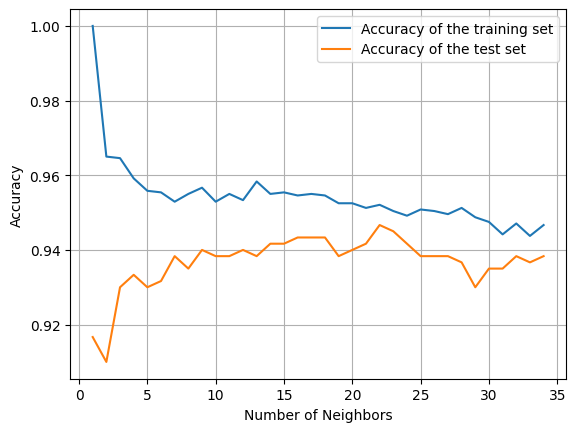

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

training_acc = []
test_acc = []

neighbors_setting = range(1, 35)
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train.values.ravel())   # ✅ تم التصحيح
    training_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting, training_acc, label='Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [7, 9, 11, 13, 15, 25, 34],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_kn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_kn.fit(X_train, y_train.values.ravel())  #_


Fitting 5 folds for each of 42 candidates, totalling 210 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [7, 9, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,13


In [23]:
best_knn = grid_kn.best_estimator_

# Make predictions on the test set
y_pred_best = best_knn.predict(X_test)

# Evaluate the model
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)
print("Accuracy with best K (24):", accuracy_best)


Accuracy with best K (24): 0.9383333333333334


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           False    True  accuracy  macro avg  weighted avg
precision    1.0     1.0       1.0        1.0           1.0
recall       1.0     1.0       1.0        1.0           1.0
f1-score     1.0     1.0       1.0        1.0           1.0
support    318.0  2082.0       1.0     2400.0        2400.0
_______________________________________________
Confusion Matrix: 
 [[ 318    0]
 [   0 2082]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support     80.0  520.0       1.0      600.0         600.0
_______________________________________________
Confusion Matrix: 
 [[ 80   0]
 [  0 520]]



In [ ]:
import joblib


model_data = {
    'model': tree_clf,
    'feature_names': list(X_train.columns),  # Save feature names
    'categorical_encoding': {
        'gender': {'Female': 0, 'Male': 1},
        'feeding_type': {
            'Breastfeeding': {'Formula': 0, 'Mixed': 0},
            'Formula': {'Formula': 1, 'Mixed': 0},
            'Mixed': {'Formula': 0, 'Mixed': 1}
        },
        'immunizations_done': {'No': 0, 'Yes': 1},
        'reflexes_normal': {'No': 0, 'Yes': 1}
    }
}

joblib.dump(model_data, "model.pkl")

['model.pkl']